In [1]:
import warnings
warnings.filterwarnings('ignore')

## Analytical solution with sympy

In [2]:
import sympy as sp
x, y = sp.symbols("x, y")
geom = sp.sqrt(x * y)
arit = (x + y)/2
display(geom) # jupyter display function
display(arit)

sqrt(x*y)

x/2 + y/2

In [3]:
poly = arit - geom
display(poly>=0)

x/2 + y/2 - sqrt(x*y) >= 0

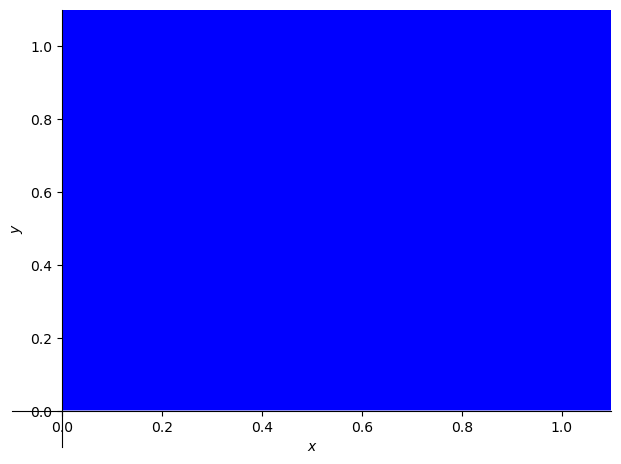

In [4]:
sp.plot_implicit(poly>=0, x_var=(x, -0.1, 1.1), y_var=(y, -0.1, 1.1))

## Numerical resolution

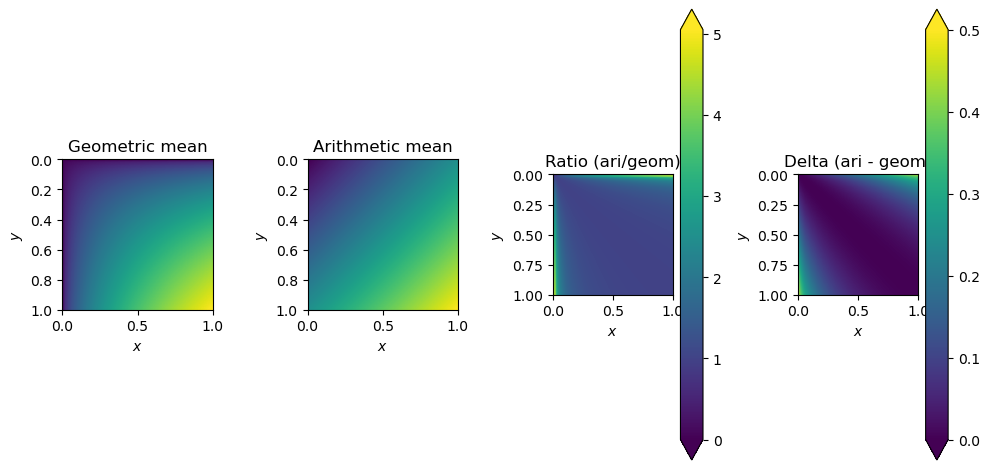

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_ech = np.linspace(0, 1, 101)
y_ech = np.linspace(0, 1, 101)
m = np.meshgrid(x_ech, y_ech)
X, Y = m[0], m[1]
 
def geometric(x, y):
    return np.sqrt(x*y)
 
def arithmetic(x, y):
    return (x+y)/2
 
def ratio(X, Y):
    return np.where(geometric(X, Y) !=0, arithmetic(X, Y)/geometric(X, Y), np.zeros(X.shape))
 
def pc(X, Y):
    """Difference in %"""
    return (np.where(geometric(X, Y) !=0, arithmetic(X, Y)/geometric(X, Y), np.zeros(X.shape)) - 1)*100
 
def delta(X, Y):
    return arithmetic(X, Y) - geometric(X, Y)

fig, axes = plt.subplots(1, 4, figsize=(10, 8))
for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
vmin=0 
vmax=1

axes[0].imshow(geometric(X, Y), vmin=vmin, vmax=vmax, interpolation=None, extent=[0, 1, 1, 0])
axes[0].set_title("Geometric mean")
axes[1].imshow(arithmetic(X, Y), vmin=vmin, vmax=vmax, interpolation=None, extent=[0, 1, 1, 0])
axes[1].set_title("Arithmetic mean")

rat = axes[2].imshow(ratio(X, Y), interpolation=None, extent=[0, 1, 1, 0])
axes[2].set_title("Ratio (ari/geom)")
cbar = fig.colorbar(rat, ax=axes[2], extend='both')
delt = axes[3].imshow(delta(X, Y), interpolation=None, extent=[0, 1, 1, 0])
axes[3].set_title("Delta (ari - geom)")
cbar = fig.colorbar(delt, ax=axes[3], extend='both')
fig.tight_layout();

## Numerical resolution (3D)

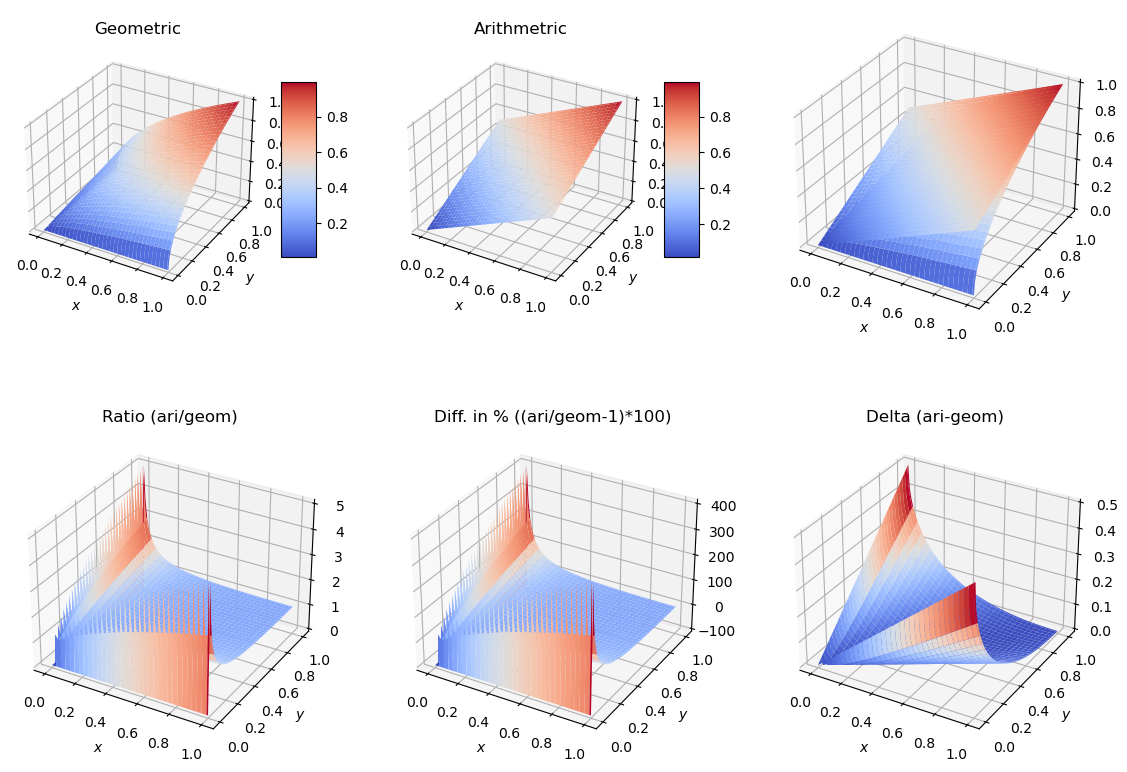

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
 
import numpy as np
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')
ax4 = fig.add_subplot(234, projection='3d')
ax5 = fig.add_subplot(235, projection='3d')
ax6 = fig.add_subplot(236, projection='3d')
 
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in axes:
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

geom_map = ax1.plot_surface(X, Y, geometric(X, Y), cmap=cm.coolwarm)
ax1.set_title("Geometric")

ari_map = ax2.plot_surface(X, Y, arithmetic(X, Y), cmap=cm.coolwarm)
ax2.set_title("Arithmetric")

ax3.plot_surface(X, Y, arithmetic(X, Y), cmap=cm.coolwarm)
ax3.plot_surface(X, Y, geometric(X, Y), cmap=cm.coolwarm)

ax4.plot_surface(X, Y, ratio(X, Y), cmap=cm.coolwarm)
ax4.set_title("Ratio (ari/geom)")
ax5.plot_surface(X, Y, pc(X, Y), cmap=cm.coolwarm)
ax5.set_title("Diff. in % ((ari/geom-1)*100)")
ax6.plot_surface(X, Y, delta(X, Y), cmap=cm.coolwarm)
ax6.set_title("Delta (ari-geom)")

fig.colorbar(geom_map, ax=ax1, shrink=0.5, aspect=5)
fig.colorbar(ari_map, ax=ax2, shrink=0.5, aspect=5)